In [1]:
# ADD THE ANNOTATION REMOVAL ok
# Do the normalisation!!!!! ok
# Look at the target samples ok
# Try more genes -- ongoing
# Use the previous background - Load only kmer col (And maybe foreground):
# - Only the background = Seems fine for now (Already the 3-exon correction... 
# - the max was not removed and the small issue in filtering annotation was not removed)
# Colour with the flags
# Remark: This is the old library size..

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
save = True


Matplotlib created a temporary config/cache directory at /scratch/slurm-job.500149/matplotlib-yl5sn25b because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
#base_brca = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_96_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'
base_brca = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'

In [4]:
base_gtex = '/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220'

In [5]:
#gtex_name = 'GTEX2019_commit_TEST_131_cb328ed_ordered_exclusive_ref_p5_35G_96_5K_pya.0.17.1_conf2_all_ref_chrall_cap'
gtex_name = 'GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap'

In [6]:
gene_suffix = 'cohort_mutNone/tmp_out_ref_batch_3864' #1707' #3864 #1713 # 941 3864

In [7]:
gtex_old_name = 'GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap'

In [8]:
base_brca_old = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'

# Gene Name

In [9]:
gene_file = os.path.join(base_gtex, gtex_name, gene_suffix, 'gene_expression_detail.gz')

In [10]:
gene_name = pd.read_csv(gene_file, sep = '\t', compression='gzip')

gene_name = gene_name['gene'][0]


In [11]:
gene_number = gene_suffix.split('_')[-1]

# Load GTEX - 1 gene

In [12]:
folder_gtex = os.path.join(base_gtex, gtex_name, gene_suffix)
print(folder_gtex)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_3864


In [13]:
path_pickle = os.path.join(base_gtex, gtex_name, gene_suffix, 'gene_kmers.pickle')
print(path_pickle)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_130_407e9b5ORDERED_ref_p15_35G_200_pya.0.17.1_conf2_all_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_3864/gene_kmers.pickle


In [14]:
# with open(path_pickle, 'wb') as handle:
#     pickle.dump(Object_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
with open(path_pickle, 'rb') as handle:
    Object_save = pickle.load(handle)

In [16]:
junction_iscrossjx_kmers = Object_save['junction_iscrossjx_kmers']
segment_notcrossseg_kmers = Object_save['segment_notcrossseg_kmers']
list_gtex_Junc = Object_save['list_gtex_Junc']
list_gtex_Segm = Object_save['list_gtex_Segm']

# Load GTEX - previous run 

In [17]:
folder_gtex_old = os.path.join(base_gtex, gtex_old_name, gene_suffix)
print(folder_gtex_old)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_3864


In [18]:
gtex_old_Junc = os.path.join(folder_gtex_old, 'ref_graph_kmer_JuncExpr.pq')
print(gtex_old_Junc)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_3864/ref_graph_kmer_JuncExpr.pq


In [19]:
gtex_old_Junc = pd.read_parquet(gtex_old_Junc)

In [20]:
gtex_old_Segm = os.path.join(folder_gtex_old, 'ref_graph_kmer_SegmExpr.pq')
print(gtex_old_Segm)

/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_3864/ref_graph_kmer_SegmExpr.pq


In [21]:
gtex_old_Segm = pd.read_parquet(gtex_old_Segm)

In [22]:
old_junction_iscrossjx_kmers = set(gtex_old_Junc.loc[gtex_old_Junc['isCrossJunction'] == True]['kmer'])

In [23]:
old_segment_notcrossseg_kmers = set(gtex_old_Segm.loc[gtex_old_Segm['isCrossJunction'] == False]['kmer'])

# Load Brca - 1 gene 

In [24]:
path_brca = os.path.join(base_brca, gene_suffix)
print(path_brca)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864


In [25]:
path_brca_pickle = os.path.join (base_brca, gene_suffix, 'junction_res_unfiltered.pickle')
print(path_brca_pickle)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864/junction_res_unfiltered.pickle


In [26]:
# with open(path_brca_pickle, 'wb') as handle:
#     pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
with open(path_brca_pickle, 'rb') as handle:
    res = pickle.load(handle)

# Load BRCA - previous run 

In [28]:
path_braca_old = os.path.join(base_brca_old, gene_suffix)
print(path_braca_old)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864


In [29]:
brca_old_Junc = os.path.join(path_braca_old, 'ref_graph_kmer_JuncExpr.pq')
print(brca_old_Junc)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864/ref_graph_kmer_JuncExpr.pq


In [30]:
brca_old_Junc = pd.read_parquet(brca_old_Junc)
brca_old_Junc = brca_old_Junc.set_index('kmer')

In [31]:
brca_old_Junc.head(3)

,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,TCGAA1A0SB01A11RA14407all,TCGAA1A0SD01A11RA11507all,...,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated,readFrameAnnotated
kmer,,,,,,,,,,,,,,,,,,,,,
LGRTGGSWC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,1.0
GRTGGSWCH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,1.0
RTGGSWCHF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,1.0


## Metadata

In [32]:
meta = os.path.join(base_brca, gene_suffix, 'ref_sample_peptides_meta.gz')
print(meta)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864/ref_sample_peptides_meta.gz


In [33]:
meta = pd.read_table(meta, delimiter='\t' , compression = 'gzip')

In [34]:
meta.head()

,peptide,id,readFrame,readFrameAnnotated,geneName,geneChr,geneStrand,mutationMode,junctionAnnotated,hasStopCodon,isInJunctionList,isIsolated,variantComb,variantSegExpr,modifiedExonsCoord,originalExonsCoord,vertexIdx,junctionExpr,segmentExpr,kmerType
0,NESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNSPGF...,ENSG00000143153.13:36_41:0:169130018:2-exons,0,False,ENSG00000143153.13,chr1,+,ref,True,1,NaN,0,NaN,NaN,169130018;169130090;169131291;169132722,169130018;169130090;169131291;169132722,36;41,NaN,NaN,2-exons
1,MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCL...,ENSG00000143153.13:5_11:0:169106829:2-exons,1,True,ENSG00000143153.13,chr1,+,ref,True,0,NaN,0,NaN,NaN,169106829;169106926;169111369;169111452,169106689;169106926;169111369;169111452,5;11,NaN,NaN,2-exons
2,MLLTISEFKPTYQDRVAPPGLTQIPQIQKTEISFRPNDPKSYEAYV...,ENSG00000143153.13:12_28:0:169111440:2-exons,1,True,ENSG00000143153.13,chr1,+,ref,True,0,NaN,0,NaN,NaN,169111440;169111498;169124883;169125038,169111369;169111498;169124883;169125039,12;28,NaN,NaN,2-exons
3,PPKNESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNS...,ENSG00000143153.13:35_39:0:169130009:2-exons,0,False,ENSG00000143153.13,chr1,+,ref,True,1,NaN,0,NaN,NaN,169130009;169130090;169131291;169132425,169130009;169130090;169131291;169132426,35;39,NaN,NaN,2-exons
4,LTQIPQIQKTEISFRPNDPKSYEAYVLNIVRFLEKYKDSAQRDDMI...,ENSG00000143153.13:28_33:0:169124885:2-exons,1,False,ENSG00000143153.13,chr1,+,ref,False,1,NaN,0,NaN,NaN,169124885;169125039;169127233;169127397,169124883;169125039;169127233;169127399,28;33,NaN,NaN,2-exons


In [35]:
jx_coord = []
for idx, row in meta.iterrows():
    if row['kmerType'] == '2-exons':
        if row['geneStrand'] == '+':
            jx_coord.append( row['originalExonsCoord'].split(';')[1] + ';' + row['originalExonsCoord'].split(';')[2])
        else:
            jx_coord.append( row['originalExonsCoord'].split(';')[0] + ';' + row['originalExonsCoord'].split(';')[3])

    else:
        if row['geneStrand'] == '+':
            jx_coord.append( row['originalExonsCoord'].split(';')[1] + ';'
                            + row['originalExonsCoord'].split(';')[2] + '&'
                            +  row['originalExonsCoord'].split(';')[3] + ';'
                            + row['originalExonsCoord'].split(';')[4])
        else:
            jx_coord.append( row['originalExonsCoord'].split(';')[0] + ';'
                            + row['originalExonsCoord'].split(';')[3] + '&'
                            +  row['originalExonsCoord'].split(';')[2] + ';'
                            + row['originalExonsCoord'].split(';')[5])


meta['jx_coord'] = jx_coord

## Annot 

In [36]:
path_brca_annot = os.path.join( base_brca, gene_suffix, 'ref_annot_kmer.gz')
print(path_brca_annot)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/cohort_mutNone/tmp_out_ref_batch_3864/ref_annot_kmer.gz


In [37]:
annot = pd.read_csv(path_brca_annot, compression = 'gzip')

In [38]:
annot = set(annot['kmer'])

## Libsize

In [39]:
path_libsize = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v3_TEST_merged3_57a6a62_libsize_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/expression_counts.libsize.tsv'

In [40]:
libsize = pd.read_csv(path_libsize, sep = '\t')

med_factor = np.median(libsize['libsize_75percent'])

norm_factor = 400000

libsize = libsize.set_index('sample')

In [41]:
libsize.head()

,libsize_75percent,libsize_total_count
sample,,
TCGA3CAAAU01A11RA41B07all,309287.0,6.256401e+09
TCGA3CAALI01A11RA41B07all,197045.0,4.167429e+09
TCGA3CAALJ01A31RA41B07all,114345.0,2.511041e+09
TCGA3CAALK01A11RA41B07all,255137.0,5.843636e+09
TCGA4HAAAK01A12RA41B07all,242561.0,5.226834e+09


In [42]:
brca_cols = [ col for col in res.columns if 'TCGA' in col]

In [43]:
for col in brca_cols:
    res[col] = res.loc[:, col]/ libsize.loc[col, 'libsize_75percent'] * norm_factor

## Subset

In [44]:
take_old_foreground = True
take_old_background = True

In [45]:
res.head(3)

,isCrossJunction,junctionAnnotated,readFrameAnnotated,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,...,TCGAULAAZ601A11RA41B07all,TCGAUUA93S01A21RA41B07all,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all
kmer,,,,,,,,,,,,,,,,,,,,,
TGKYYPYYG,True,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
FKPKNESLE,True,False,False,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
RVAPPVETV,True,False,True,0.0,0.0,0.0,1.567785,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.758188,0.0,0.0


In [46]:
def get_subsets(res):
    print('initial', res.shape)
    res = res.reset_index().drop_duplicates()
    print('unique', res.shape)
    res = res.loc[res['isCrossJunction'] == True]
    print('only junctions', res.shape)
    res = res.drop_duplicates()
    print('unique only junctions', res.shape)
    res = res.drop_duplicates()
    res = res.set_index('kmer')
    return res

In [47]:
# Subsets
res = get_subsets(res)

if take_old_foreground:
    brca_old_Junc = get_subsets(brca_old_Junc)

initial (426, 1105)
unique (251, 1106)
only junctions (163, 1106)
unique only junctions (163, 1106)
initial (206, 1105)
unique (206, 1106)
only junctions (119, 1106)
unique only junctions (119, 1106)


## Make difference

In [48]:
# Both new runs
brca_junction = set(res.index)

all_gtex = junction_iscrossjx_kmers.union(segment_notcrossseg_kmers)

keep = brca_junction.difference(all_gtex)
keep = keep.difference(annot)
print(len(keep))


24


In [49]:
# Foreground new - Background old
brca_junction = set(res.index)

old_all_gtex = old_junction_iscrossjx_kmers.union(old_segment_notcrossseg_kmers)

keep_bold = brca_junction.difference(old_all_gtex)
keep_bold = keep.difference(annot)
print(len(keep))

print('(New foreground \ New Background) VS (New foreground \ Old Background)')
print(keep.difference(keep_bold))
print('(New foreground \ Old Background) VS (New foreground \ New Background)')
print(keep_bold.difference(keep))

24
(New foreground \ New Background) VS (New foreground \ Old Background)
set()
(New foreground \ Old Background) VS (New foreground \ New Background)
set()


In [50]:
# Foreground old - Background old

In [51]:
brca_junction = set(brca_old_Junc.index)

old_all_gtex = old_junction_iscrossjx_kmers.union(old_segment_notcrossseg_kmers)

keep_fold_bold = brca_junction.difference(old_all_gtex)
keep_fold_bold = keep_fold_bold.difference(annot)
print(len(keep))

print('(New foreground \ New Background) VS (OLD foreground \ Old Background)')
print(keep.difference(keep_fold_bold))
print('(OLD foreground \ Old Background) VS (New foreground \ New Background)')
print(keep_fold_bold.difference(keep))

24
(New foreground \ New Background) VS (OLD foreground \ Old Background)
set()
(OLD foreground \ Old Background) VS (New foreground \ New Background)
set()


In [52]:
#'IMCPNSEKC' in old_all_gtex

In [53]:
#'IMCPNSEKC' in all_gtex

In [54]:
#'IMCPNSEKC' in brca_old_Junc.index

In [55]:
#'IMCPNSEKC' in res.index

In [56]:
#res.head()

In [57]:
#res.loc['IMCPNSEKC']

## Get Statistics

In [58]:
def get_statistics(res):
    res['mean normalized expression'] = res.loc[:, brca_cols].mean(axis = 1)
    res['max normalized expression'] = res.loc[:, brca_cols].max(axis = 1)
    res['min normalized expression'] = res.loc[:, brca_cols].min(axis = 1)
    res['median normalized expression'] = res.loc[:, brca_cols].min(axis = 1)
    tmp = res.loc[:, brca_cols] > 0
    res['recurrence across samples'] = tmp.sum(axis = 1)
    return res


In [59]:
# Statistics
res = get_statistics(res)
if take_old_foreground:
    brca_old_Junc = get_statistics(brca_old_Junc)

In [60]:
# Filter
res_filtered = res.loc[keep]
res_filtered = res_filtered.reset_index()

if take_old_foreground:
    res_filtered_fold_bold = brca_old_Junc.loc[keep_fold_bold]
if take_old_background:
    res_filtered_bold = res.loc[keep_bold]

## Plot

### Plot 1

save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/gene_3864_ENSG00000143153.13_before_filtering.pdf


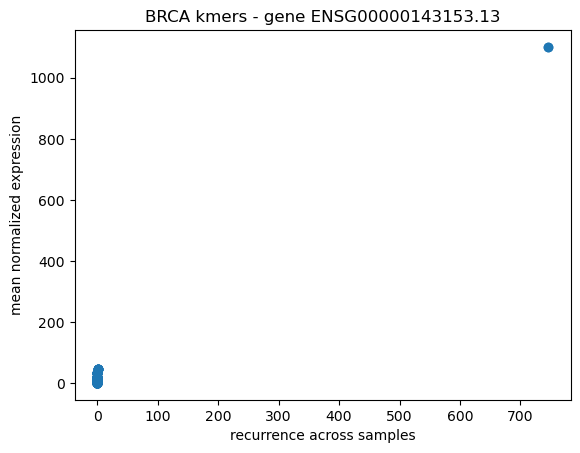

In [61]:

plt.title(f'BRCA kmers - gene {gene_name}')
plt.scatter(res['mean normalized expression'], res['recurrence across samples'])
plt.xlabel('recurrence across samples')
plt.ylabel('mean normalized expression')
save_path = os.path.join(base_brca, f'gene_{gene_number}_{gene_name}_before_filtering.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()


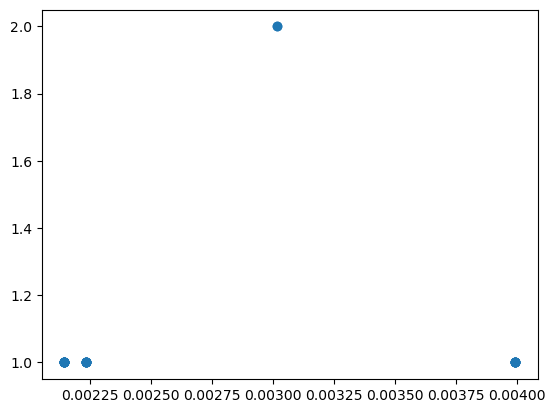

In [62]:
plt.scatter(res_filtered['mean normalized expression'], res_filtered ['recurrence across samples'])
plt.show()

/scratch/slurm-job.500149/ipykernel_229096/2414406991.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_ALL_407e9b5_withannot_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/gene_3864_ENSG00000143153.13_removed-all-gtex.pdf


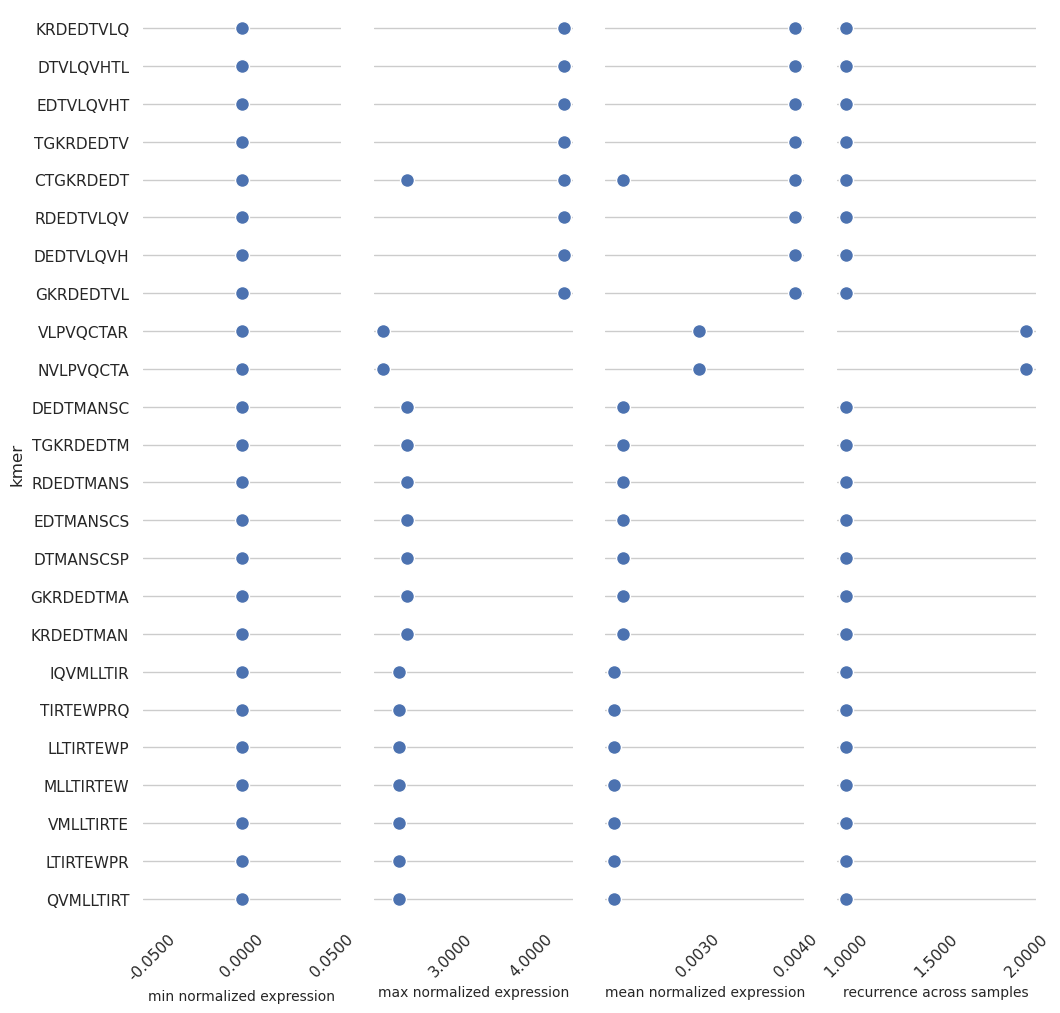

In [71]:

sns.set_theme(style="whitegrid")
pltvars = ['min normalized expression', 'max normalized expression',
           'mean normalized expression',  'recurrence across samples']
          


# Make the PairGrid
g = sns.PairGrid(res_filtered.reset_index().sort_values(pltvars[2], ascending=False),
                 x_vars=pltvars, y_vars=["kmer"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = pltvars

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    #ax.set(title=title)
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    ax.xaxis.set_major_formatter('{x:9<5.4f}')

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.xaxis.label.set_size(10)
sns.despine(left=True, bottom=True)

save_path = os.path.join(base_brca, f'gene_{gene_number}_{gene_name}_removed-all-gtex.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()

### Interpretation of the clusters

In [64]:
meta.groupby('kmerType').count()

,peptide,id,readFrame,readFrameAnnotated,geneName,geneChr,geneStrand,mutationMode,junctionAnnotated,hasStopCodon,isInJunctionList,isIsolated,variantComb,variantSegExpr,modifiedExonsCoord,originalExonsCoord,vertexIdx,junctionExpr,segmentExpr,jx_coord
kmerType,,,,,,,,,,,,,,,,,,,,
2-exons,59,59,59,59,59,59,59,59,59,59,0,59,0,0,59,59,59,0,0,59
3-exons_9-mer,6,6,6,6,6,6,6,6,6,6,0,6,0,0,6,6,6,0,0,6


In [65]:
meta.head()

,peptide,id,readFrame,readFrameAnnotated,geneName,geneChr,geneStrand,mutationMode,junctionAnnotated,hasStopCodon,...,isIsolated,variantComb,variantSegExpr,modifiedExonsCoord,originalExonsCoord,vertexIdx,junctionExpr,segmentExpr,kmerType,jx_coord
0,NESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNSPGF...,ENSG00000143153.13:36_41:0:169130018:2-exons,0,False,ENSG00000143153.13,chr1,+,ref,True,1,...,0,NaN,NaN,169130018;169130090;169131291;169132722,169130018;169130090;169131291;169132722,36;41,NaN,NaN,2-exons,169130090;169131291
1,MARGKAKEEGSWKKFIWNSEKKEFLGRTGGSWFKILLFYVIFYGCL...,ENSG00000143153.13:5_11:0:169106829:2-exons,1,True,ENSG00000143153.13,chr1,+,ref,True,0,...,0,NaN,NaN,169106829;169106926;169111369;169111452,169106689;169106926;169111369;169111452,5;11,NaN,NaN,2-exons,169106926;169111369
2,MLLTISEFKPTYQDRVAPPGLTQIPQIQKTEISFRPNDPKSYEAYV...,ENSG00000143153.13:12_28:0:169111440:2-exons,1,True,ENSG00000143153.13,chr1,+,ref,True,0,...,0,NaN,NaN,169111440;169111498;169124883;169125038,169111369;169111498;169124883;169125039,12;28,NaN,NaN,2-exons,169111498;169124883
3,PPKNESLETYPVMKYNPNVLPVQCTGKRDEDKDKVGNVEYFGLGNS...,ENSG00000143153.13:35_39:0:169130009:2-exons,0,False,ENSG00000143153.13,chr1,+,ref,True,1,...,0,NaN,NaN,169130009;169130090;169131291;169132425,169130009;169130090;169131291;169132426,35;39,NaN,NaN,2-exons,169130090;169131291
4,LTQIPQIQKTEISFRPNDPKSYEAYVLNIVRFLEKYKDSAQRDDMI...,ENSG00000143153.13:28_33:0:169124885:2-exons,1,False,ENSG00000143153.13,chr1,+,ref,False,1,...,0,NaN,NaN,169124885;169125039;169127233;169127397,169124883;169125039;169127233;169127399,28;33,NaN,NaN,2-exons,169125039;169127233


In [66]:
res_filtered.sort_values(pltvars[2])

,kmer,isCrossJunction,junctionAnnotated,readFrameAnnotated,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,...,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,mean normalized expression,max normalized expression,min normalized expression,median normalized expression,recurrence across samples
21,MLLTIRTEW,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
2,LLTIRTEWP,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
3,LLTIRTEWP,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
22,MLLTIRTEW,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
16,IQVMLLTIR,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
25,LTIRTEWPR,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
7,QVMLLTIRT,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
24,LTIRTEWPR,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
23,VMLLTIRTE,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1
11,TIRTEWPRQ,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.002147,2.365653,0.0,0.0,1


In [67]:
for idx, row in res_filtered.sort_values(pltvars[2]).iterrows():
    loc_samples = np.where(row.loc[brca_cols])[0]
    
    kmer = row['kmer']
    index_peptides = [idx for idx, pep in enumerate(meta['peptide']) if kmer in pep]
    coord_peptides = meta.iloc[index_peptides][ 'jx_coord'].values[0]
    print(loc_samples, ';', coord_peptides)

[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[873] ; 169111452;169111474
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[705] ; 169130090;169131291&169131302;169131375
[ 17 871] ; 169130085;169131291
[ 17 871] ; 169130085;169131291
[372] ; 169130090;169131291&169131302;169131889
[372] ; 169130090;169131291&169131302;169131375
[372] ; 169130090;169131291&169131302;169131889
[372] ; 169130090;169131291&169131302;169131889
[372] ; 169130090;169131291&169131302;169131889
[372

In [68]:
for idx, row in res_filtered.sort_values(pltvars[2]).iterrows():
    loc_samples = np.where(row.loc[brca_cols])[0]
    kmer = row['kmer']
    print(kmer)
    index_peptides = [idx for idx, pep in enumerate(meta['peptide']) if kmer in pep]
    #print(loc_samples)
    print('brca sample presence', np.array(brca_cols)[loc_samples])
    print(row.loc[['mean normalized expression', 'max normalized expression']])
    coord_peptides = meta.iloc[index_peptides][ 'jx_coord'].values[0]
    print('jx coord', coord_peptides)
    print('index of peptides containing the kmer', index_peptides)

    print('\t')

MLLTIRTEW
brca sample presence ['TCGAE2A1L801A11RA13Q07all']
mean normalized expression    0.002147
max normalized expression     2.365653
Name: 21, dtype: object
jx coord 169111452;169111474
index of peptides containing the kmer [19, 52, 53, 60]
	
LLTIRTEWP
brca sample presence ['TCGAE2A1L801A11RA13Q07all']
mean normalized expression    0.002147
max normalized expression     2.365653
Name: 2, dtype: object
jx coord 169111452;169111474
index of peptides containing the kmer [19, 52, 53, 60]
	
LLTIRTEWP
brca sample presence ['TCGAE2A1L801A11RA13Q07all']
mean normalized expression    0.002147
max normalized expression     2.365653
Name: 3, dtype: object
jx coord 169111452;169111474
index of peptides containing the kmer [19, 52, 53, 60]
	
MLLTIRTEW
brca sample presence ['TCGAE2A1L801A11RA13Q07all']
mean normalized expression    0.002147
max normalized expression     2.365653
Name: 22, dtype: object
jx coord 169111452;169111474
index of peptides containing the kmer [19, 52, 53, 60]
	
IQVMLL

In [69]:
# Same Junction + 3 reading frames = 
# 9 *3 = 27 Max

# TEST

In [72]:
path='/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/GTEX2019_commit_TEST_131_cb328ed_ordered_exclusive_ref_p5_35G_96_5K_pya.0.17.1_conf2_all_ref_chrall_cap/cohort_mutNone/tmp_out_ref_batch_96/ref_graph_kmer_JuncExpr/part-0a916208-845a-411d-86c5-0a929a14ed91.gz'

In [73]:
foo = pd.read_csv(path, compression = 'gzip', sep = '\t')

In [74]:
foo.head()

,kmer,isCrossJunction,junctionAnnotated,readFrameAnnotated,SRR1068687all,SRR1068788all,SRR1068808all,SRR1068832all,SRR1068855all,SRR1068880all,...,SRR821626all,SRR821653all,SRR821666all,SRR821690all,SRR821715all,SRR821846all,SRR823967all,SRR823991all,SRR824015all,SRR824039all
0,TLAGVRVPA,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LGTYVFWNI,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PTVLLAIPE,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TWASMTTCL,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LAGVRVPAL,True,False,False,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
foo.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4996    False
4997     True
4998    False
4999    False
5000    False
Length: 5001, dtype: bool

In [78]:
foo.iloc[4997]

kmer                  VSPSGADTC
isCrossJunction            True
junctionAnnotated         False
readFrameAnnotated        False
SRR1068687all               NaN
                        ...    
SRR821846all                NaN
SRR823967all                NaN
SRR823991all                NaN
SRR824015all                NaN
SRR824039all                NaN
Name: 4997, Length: 9759, dtype: object

In [81]:
display(foo.iloc[4997: 4998, :])

,kmer,isCrossJunction,junctionAnnotated,readFrameAnnotated,SRR1068687all,SRR1068788all,SRR1068808all,SRR1068832all,SRR1068855all,SRR1068880all,...,SRR821626all,SRR821653all,SRR821666all,SRR821690all,SRR821715all,SRR821846all,SRR823967all,SRR823991all,SRR824015all,SRR824039all
4997,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
foo.loc[foo['kmer'] == 'VSPSGADTC']

,kmer,isCrossJunction,junctionAnnotated,readFrameAnnotated,SRR1068687all,SRR1068788all,SRR1068808all,SRR1068832all,SRR1068855all,SRR1068880all,...,SRR821626all,SRR821653all,SRR821666all,SRR821690all,SRR821715all,SRR821846all,SRR823967all,SRR823991all,SRR824015all,SRR824039all
2080,VSPSGADTC,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,VSPSGADTC,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3285,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3286,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3288,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,VSPSGADTC,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
test = set()

In [122]:
to_add = list(foo.values[0])

In [123]:
to_add

['TLAGVRVPA',
 True,
 True,
 False,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [124]:
to_add = tuple(to_add)

In [125]:
to_add

('TLAGVRVPA',
 True,
 True,
 False,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [126]:
test.add(to_add)

In [127]:
len(test)

1

In [134]:
test.add(to_add)

In [135]:
len(test)

1

In [129]:
len(test)

1

In [120]:
len(test)

1